In [1]:
#Import libary yang dibutukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
#import itertools
#from matplotlib.pyplot import cm
from scipy.spatial.distance import pdist, cityblock, euclidean
from mpl_toolkits import mplot3d
%matplotlib inline
%matplotlib notebook

In [2]:
#Membaca dataset dari file
df = pd.read_csv("D:/dataset_setelah_preprocessing.csv")
pd.set_option('precision', 2)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   account             566 non-null    object 
 1   kda                 566 non-null    float64
 2   teamfight           566 non-null    float64
 3   gold/min            566 non-null    float64
 4   damagetohero/min    566 non-null    float64
 5   death/match         566 non-null    float64
 6   turretdamage/match  566 non-null    float64
 7   favorite            566 non-null    float64
dtypes: float64(7), object(1)
memory usage: 35.5+ KB


,kda,teamfight,gold/min,damagetohero/min,death/match,turretdamage/match,favorite
count,566.00,566.00,566.00,566.00,566.00,566.00,566.00
mean,0.37,0.52,0.39,0.22,0.45,0.30,0.45
std,0.16,0.16,0.17,0.10,0.16,0.16,0.30
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.25,0.42,0.27,0.14,0.34,0.19,0.20
50%,0.36,0.50,0.37,0.21,0.44,0.28,0.40
75%,0.47,0.62,0.50,0.28,0.55,0.40,0.60
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [3]:
df1 = df.iloc[:, 1:8]
df_array = np.array(df1)

In [4]:
#Mendefinisikan parameter k-means klustering
k = 6 #jumlah klaster yg diinginkan
iterationCounter = 0 #counter untuk iterasi
input = df_array #input data

In [5]:
#Fungsi utama algoritma k-medians
def kMedians(data, centroidInit):
    nCluster = k #banyaknya cluster
    global iterationCounter
    centroidInit = np.matrix(centroidInit)
    # looping hingga konvergen
    while(True):
        iterationCounter +=1
        global manhattanMatrixAllCluster
        global manhattanMatrix
        global deltaMatrix
        manhattanMatrixAllCluster = np.ndarray(shape=
                                               (data.shape[0], 0))
        #ulangi proses untuk semua cluster
        for i in range(0, nCluster):
            centroidRepeated = np.repeat(centroidInit[i,:],
                                         data.shape[0], axis=0)
            deltaMatrix = abs(np.subtract(data,centroidRepeated))
            #hitung jarak Manhattan
            manhattanMatrix = deltaMatrix.sum(axis=1)
            manhattanMatrixAllCluster = np.concatenate((
                manhattanMatrixAllCluster, manhattanMatrix), axis=1)
        #tempatkan data ke cluster yang jarak Manhattannya paling dekat
        global clusterMatrix
        clusterMatrix = np.ravel(np.argmin(
            np.matrix(manhattanMatrixAllCluster), axis=1))
        listClusterMember = [[] for i in range(k)]
        for i in range(0, data.shape[0]):
            listClusterMember[clusterMatrix[i].item()].append(data[i,:])
            
            
        #hitung titik pusat cluster terbaru
        global newCentroid 
        newCentroid = np.ndarray(shape=(0, centroidInit.shape[1]))
        for i in range(0,nCluster):
            memberCluster = np.asmatrix(listClusterMember[i])
            centroidCluster = np.median(memberCluster, axis=0)
            newCentroid = np.concatenate((newCentroid,
                                          centroidCluster), axis=0)
        np.set_printoptions(precision=3)
        print("ITERASI: ", iterationCounter)
        print("Hasil Manhattan Distance :")
        print(manhattanMatrixAllCluster)
        print("Hasil Cluster :")
        print(clusterMatrix)
        print("Centroid Baru :")
        print(newCentroid)
        #break dari loop jika sudah konvergen
        if((centroidInit == newCentroid).all()):
            break
        # update titik pusat cluster dengan nilai yg baru
        centroidInit = newCentroid
        # diberi jeda 1 detik agak hasil plot cluster nyaman dilihat
        time.sleep(1)
    
    return listClusterMember, centroidInit
    

In [6]:
#Panggil fungsi inisialisasi klater
centroidInit = np.array(
    [
        [0.35, 0.50, 0.26, 0.13, 0.42, 0.16, 0.00],
        [0.30, 0.46, 0.42, 0.22, 0.47, 0.33, 0.20],
        [0.36, 0.50, 0.43, 0.26, 0.45, 0.34, 0.40],
        [0.38, 0.62, 0.40, 0.28, 0.46, 0.29, 0.40],
        [0.41, 0.54, 0.52, 0.28, 0.41, 0.51, 0.80],
        [0.32, 0.54, 0.28, 0.14, 0.47, 0.18, 1.00]
    ]
)
#Panggil fungsi k-means
clusterResults, centroid = kMedians(input, centroidInit)

ITERASI:  1
Hasil Manhattan Distance :
[[0.268 0.634 0.97  1.04  1.78  1.182]
 [0.539 0.822 1.122 1.115 1.855 1.412]
 [0.725 1.085 1.225 1.275 1.855 1.495]
 ...
 [0.863 0.574 0.794 0.844 1.424 1.533]
 [2.746 2.266 1.886 1.816 1.755 2.536]
 [2.194 1.714 1.334 1.264 1.324 2.384]]
Hasil Cluster :
[0 0 0 5 0 0 0 0 2 2 0 0 0 2 0 0 0 0 0 0 3 0 0 0 0 0 1 0 0 0 0 0 5 0 0 5 0
 0 0 0 5 0 0 0 0 0 1 0 0 3 0 0 4 2 0 0 0 2 0 5 1 0 0 0 0 0 1 0 0 3 0 0 0 0
 1 0 0 1 3 3 0 0 0 0 5 0 0 0 3 0 3 0 0 0 0 3 4 3 4 4 3 4 4 4 4 0 2 4 4 4 5
 4 4 3 4 4 4 4 4 4 4 4 2 4 2 1 5 3 2 2 3 4 1 4 4 2 4 2 4 5 4 2 4 4 4 4 4 4
 5 4 4 5 1 4 4 5 3 3 4 4 3 4 4 4 3 1 4 4 3 3 4 4 1 4 4 4 1 1 4 2 4 5 4 1 4
 5 5 5 5 5 5 5 5 5 5 5 5 5 1 5 5 5 5 5 5 5 0 2 0 0 0 2 0 4 1 3 0 0 2 0 2 5
 2 5 0 5 0 5 4 0 0 5 5 5 5 5 3 0 2 5 5 5 5 5 5 5 3 5 2 5 5 5 5 5 5 5 2 5 5
 5 5 5 5 5 5 0 0 5 5 3 5 5 5 5 5 5 5 5 5 5 0 1 0 1 3 4 1 1 2 0 1 0 2 1 2 2
 0 4 3 3 1 4 3 1 1 5 1 1 1 1 2 1 1 1 1 4 1 3 2 2 1 1 3 2 1 1 1 2 1 4 1 3 1
 1 2 0 1 2 1 1 2 3 4 3 3 0 1 2

ITERASI:  6
Hasil Manhattan Distance :
[[0.322 0.568 0.689 1.5   1.955 1.18 ]
 [0.527 0.669 0.899 1.576 2.03  1.444]
 [0.709 1.161 1.281 1.231 1.923 1.451]
 ...
 [0.89  0.583 0.726 0.912 1.492 1.571]
 [2.734 2.501 2.339 1.356 1.627 2.616]
 [2.182 1.949 1.787 0.804 1.149 2.464]]
Hasil Cluster :
[0 0 0 5 0 1 0 0 2 2 0 0 0 2 0 0 0 1 0 0 3 0 0 1 2 0 1 0 0 0 0 0 5 0 0 2 0
 0 2 0 5 0 0 0 0 0 1 0 0 2 0 0 5 2 0 0 0 2 0 5 1 0 0 0 0 0 3 0 0 3 0 0 0 0
 1 0 0 1 3 3 0 0 0 0 5 0 0 0 3 0 0 0 0 0 0 3 4 3 4 4 3 4 4 4 4 0 3 4 4 4 5
 4 4 3 4 4 4 4 4 4 4 4 2 4 2 1 5 2 4 3 3 4 1 4 2 2 4 2 4 2 4 2 4 4 4 4 4 2
 2 4 2 5 1 4 4 2 3 3 4 4 3 4 4 4 3 1 4 2 3 3 4 4 3 2 4 4 1 4 4 3 4 2 4 3 4
 5 5 5 5 5 5 5 5 5 5 5 5 5 1 5 5 5 5 5 5 5 0 2 0 0 0 2 0 4 1 2 1 0 2 0 2 5
 2 5 0 5 0 5 4 0 0 2 5 5 5 5 3 0 3 5 5 5 5 5 5 5 3 5 2 5 5 5 5 5 5 5 2 5 5
 5 5 5 5 5 5 1 0 5 5 3 5 5 2 5 5 5 5 5 5 5 2 1 0 1 1 2 1 0 2 0 1 0 3 1 3 3
 0 4 1 3 1 4 3 3 1 2 1 1 1 1 2 1 1 1 1 4 1 1 2 2 1 1 3 3 3 1 1 2 1 4 1 1 1
 1 3 1 1 2 3 1 2 3 4 3 3 1 1 2

ITERASI:  11
Hasil Manhattan Distance :
[[0.362 0.552 0.698 1.51  1.945 1.271]
 [0.508 0.663 0.882 1.586 2.021 1.497]
 [0.728 1.145 1.291 1.241 1.929 1.399]
 ...
 [0.908 0.582 0.749 0.922 1.499 1.538]
 [2.714 2.517 2.367 1.346 1.632 2.544]
 [2.162 1.965 1.816 0.794 1.159 2.392]]
Hasil Cluster :
[0 0 0 5 0 1 0 0 2 2 0 0 0 2 0 0 0 1 0 0 3 0 0 1 2 0 1 0 0 0 0 1 5 0 0 2 0
 0 2 0 5 0 0 0 0 0 1 0 0 2 0 0 5 2 0 0 0 2 0 5 1 0 0 0 0 0 3 0 0 3 0 0 0 0
 1 0 0 1 3 3 0 0 0 0 5 0 0 0 3 0 0 0 0 0 0 3 4 3 4 4 3 4 4 4 4 0 3 4 4 4 5
 4 4 3 4 4 4 4 4 4 4 4 2 4 2 1 5 2 4 3 3 4 1 4 2 2 4 2 4 2 4 2 4 4 4 4 4 2
 2 4 2 2 1 4 4 2 3 3 4 4 3 4 4 4 3 1 4 2 3 3 4 4 3 2 4 4 1 3 4 3 4 2 4 3 4
 5 5 5 5 5 5 5 5 5 5 5 5 5 1 5 5 5 5 5 5 5 0 2 0 0 0 2 0 4 1 5 1 0 2 0 2 5
 2 5 0 2 0 5 4 0 0 2 2 5 5 5 3 0 3 5 5 5 5 5 5 5 3 5 2 5 5 5 5 5 5 5 2 5 5
 5 5 5 5 5 5 1 0 5 5 3 5 5 2 5 5 2 5 5 5 5 2 1 0 1 1 2 1 0 2 0 1 0 3 1 3 3
 0 4 1 3 1 4 3 3 1 2 1 1 1 1 2 1 1 1 1 4 1 1 2 2 1 1 3 3 3 1 1 2 1 4 1 1 1
 1 3 1 1 2 3 1 2 3 4 3 3 1 1 

In [7]:
hasil_man = pd.DataFrame(manhattanMatrixAllCluster, 
                         columns=['jarakkect1','jarakkect2','jarakkect3',
                                  'jarakkect4', 'jarakkect5','jarakkect6'])

In [8]:
minimum = np.min(manhattanMatrixAllCluster, axis = 1)
min_array = np.array(minimum)
hasil_man["jarakterdekat"] = min_array
column_account = df.drop(['kda','teamfight','gold/min','damagetohero/min',
                                      'death/match','turretdamage/match','favorite'], axis=1)
column_array = np.array(column_account)
df7 = pd.DataFrame(column_array, columns=['account'])
Hasil_man = df7.join(hasil_man)
Hasil_man

,account,jarakkect1,jarakkect2,jarakkect3,jarakkect4,jarakkect5,jarakkect6,jarakterdekat
0,Killerfrost,0.36,0.55,0.70,1.51,1.94,1.27,0.36
1,Hellsing,0.51,0.66,0.88,1.59,2.02,1.50,0.51
2,Limitretina,0.73,1.14,1.29,1.24,1.93,1.40,0.73
3,Janetzy,1.38,1.22,0.96,1.90,1.53,0.37,0.37
4,Evo,0.47,0.97,1.11,1.01,1.68,1.15,0.47
...,...,...,...,...,...,...,...,...
561,Kantunan,1.74,1.23,1.08,1.05,0.41,1.05,0.41
562,Tomorrow,1.42,1.22,1.07,0.46,0.57,1.65,0.46
563,Catchmeifyoucan,0.91,0.58,0.75,0.92,1.50,1.54,0.58
564,Altamiz,2.71,2.52,2.37,1.34,1.64,2.54,1.34


In [9]:
cluster = [i+1 for i in clusterMatrix]
df2 = pd.DataFrame(df1, columns=['kda','teamfight','gold/min','damagetohero/min',
                                      'death/match','turretdamage/match','favorite'])
fix = df2.join(hasil_man)
fix["cluster"] = cluster

In [10]:
column_account = df.drop(['kda','teamfight','gold/min','damagetohero/min',
                                      'death/match','turretdamage/match','favorite'], axis=1)
column_array = np.array(column_account)
df3 = pd.DataFrame(column_array, columns=['account'])
Hasil_kmedians = df3.join(fix)
Hasil_kmedians

,account,kda,teamfight,gold/min,damagetohero/min,death/match,turretdamage/match,favorite,jarakkect1,jarakkect2,jarakkect3,jarakkect4,jarakkect5,jarakkect6,jarakterdekat,cluster
0,Killerfrost,0.32,0.42,0.30,0.15,0.50,0.18,0.0,0.36,0.55,0.70,1.51,1.94,1.27,0.36,1
1,Hellsing,0.24,0.54,0.39,0.14,0.61,0.11,0.0,0.51,0.66,0.88,1.59,2.02,1.50,0.51,1
2,Limitretina,0.51,0.50,0.16,0.11,0.19,0.15,0.2,0.73,1.14,1.29,1.24,1.93,1.40,0.73,1
3,Janetzy,0.25,0.46,0.27,0.14,0.58,0.13,1.0,1.38,1.22,0.96,1.90,1.53,0.37,0.37,6
4,Evo,0.50,0.54,0.21,0.13,0.33,0.15,0.2,0.47,0.97,1.11,1.01,1.68,1.15,0.47,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,Kantunan,0.33,0.54,0.57,0.30,0.54,0.42,0.8,1.74,1.23,1.08,1.05,0.41,1.05,0.41,5
562,Tomorrow,0.43,0.58,0.63,0.31,0.38,0.46,0.4,1.42,1.22,1.07,0.46,0.57,1.65,0.46,4
563,Catchmeifyoucan,0.45,0.42,0.36,0.21,0.22,0.26,0.2,0.91,0.58,0.75,0.92,1.50,1.54,0.58,2
564,Altamiz,0.85,0.88,0.74,0.44,0.15,0.37,0.6,2.71,2.52,2.37,1.34,1.64,2.54,1.34,4


In [11]:
Hasil_kmedians.to_csv('D:/hasil_kmedians_iterasi_terakhir.csv')

In [12]:
Hasil_kmedians["cluster"].value_counts()

3    131
4    127
1     87
2     83
6     71
5     67
Name: cluster, dtype: int64

In [13]:
nc = np.array(newCentroid) 

In [14]:
labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6']
colors = np.array(["black", "blue", "crimson", "cyan", "gold", "purple"])
point = clusterMatrix
y = point

<IPython.core.display.Javascript object>


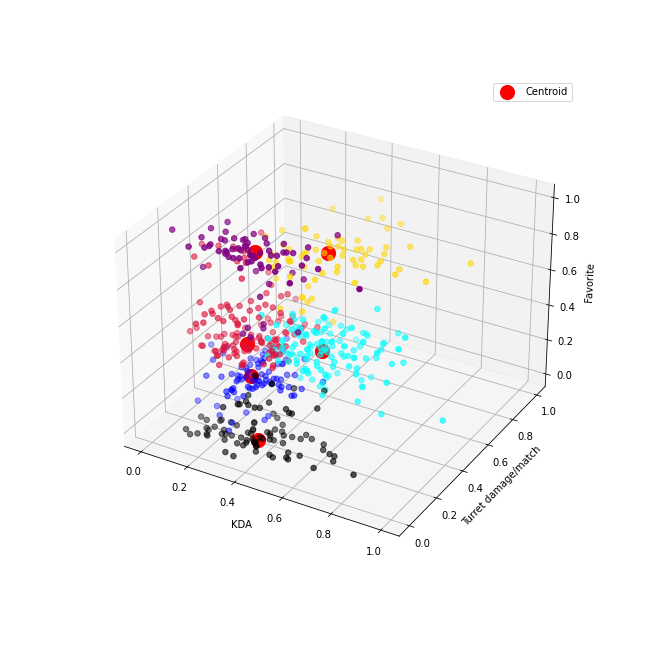

In [15]:
plt.figure('K-Medians on Mobile Legend Dataset', figsize=(9,9))
ax = plt.axes(projection = '3d')
ax.scatter(df_array[:,0],df_array[:,5],df_array[:,6], c=colors[y], s=30)

# color missclassified data

#ax.scatter(X[k_means_predicted!=y,3],X[k_means_predicted!=y,0],X[k_means_predicted!=y,2] ,c='b', s=50)

# plot centroids

ax.scatter(nc[0,0],nc[0,5],nc[0,6] ,c='r', s=200, alpha = 1, label='Centroid')
ax.scatter(nc[1,0],nc[1,5],nc[1,6] ,c='r', s=200, alpha = 1)
ax.scatter(nc[2,0],nc[2,5],nc[2,6] ,c='r', s=200, alpha = 1)
ax.scatter(nc[3,0],nc[3,5],nc[3,6] ,c='r', s=200, alpha = 1)
ax.scatter(nc[4,0],nc[4,5],nc[4,6] ,c='r', s=200, alpha = 1)
ax.scatter(nc[5,0],nc[5,5],nc[5,6] ,c='r', s=200, alpha = 1)
ax.set_xlabel('KDA')
ax.set_ylabel('Turret damage/match')
ax.set_zlabel('Favorite')
ax.legend()

In [16]:
def DaviesBouldins(X, labels):
    n_cluster = len(np.bincount(labels))
    cluster_k = [X[labels == k] for k in range(n_cluster)]
    centroids = [np.median(k, axis = 0) for k in cluster_k]
    S = [np.mean([cityblock(p, centroids[i]) for p in k]) for i, k in enumerate(cluster_k)]
    Ri = []

    for i in range(n_cluster):
        Rij = []
        
        for j in range(n_cluster):
            if j != i:
                r = (S[i] + S[j]) / euclidean(centroids[i], centroids[j])
                Rij.append(r)
        
        Ri.append(max(Rij)) 
    dbi = np.mean(Ri)

    return dbi

In [17]:
DaviesBouldins(df_array, y)

3.554498058336416

In [18]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(df_array, y)

1.4874305544089115